In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("fenerbahce_beko_news_all_cleaned.csv")
df.head()

,title,text,date,clean_text
0,Bogdanovic 62 Maç Sonra İlk Kez,By Eurohoops Team /info@eurohoops.net\nFenerba...,20/May/16 18:34,fenerbahçe nin sırp oyuncusu bogdan bogdanovic...
1,Fenerbahçe Deplasmanda İşi Bitirdi,By Semih Tuna/info@eurohoops.net\nSpor Toto Ba...,20/May/16 18:25,spor toto basketbol ligi playoff çeyrek final ...
2,2016 Final Four Filmi,By Eurohoops team/info@eurohoops.net\nBerlin’d...,20/May/16 14:24,berlin de düzenlenen 2016 final four undan bir...
3,"Kenan Sipahi Karşıyaka’yla Parlıyor, Geleceği ...",By Bugra Uzar/info@eurohoops.net\nBu sezon baş...,19/May/16 14:28,bu sezon başındafenerbahçe den pınar karşıyaka...
4,Fenerbahçe İlk Adımı Attı,By Eurohoops team/info@eurohoops.net\nSpor Tot...,18/May/16 22:09,spor toto basketbol ligi playoff çeyrek final ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10416 entries, 0 to 10415
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       10416 non-null  object
 1   text        10416 non-null  object
 2   date        10416 non-null  object
 3   clean_text  10407 non-null  object
dtypes: object(4)
memory usage: 325.6+ KB


In [4]:
df.isnull().sum()

title         0
text          0
date          0
clean_text    9
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

title         0
text          0
date          0
clean_text    0
dtype: int64

In [7]:
ay_map = {
    "Oca": "Jan",
    "Şub": "Feb",
    "Mar": "Mar",
    "Nis": "Apr",
    "May": "May",
    "Haz": "Jun",
    "Tem": "Jul",
    "Ağu": "Aug",
    "Eyl": "Sep",
    "Eki": "Oct",
    "Kas": "Nov",
    "Ara": "Dec"
}

In [8]:
df["date_fixed"] = df["date"]

for tr, en in ay_map.items():
    df["date_fixed"] = df["date_fixed"].str.replace(tr, en, regex=False)

In [9]:
# Datetime’a Çevir
df["date_fixed"] = pd.to_datetime(
    df["date_fixed"],
    format="%d/%b/%y %H:%M",
    errors="coerce"
)

In [10]:
df["date_fixed"].isna().sum()

np.int64(76)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10407 entries, 0 to 10415
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       10407 non-null  object        
 1   text        10407 non-null  object        
 2   date        10407 non-null  object        
 3   clean_text  10407 non-null  object        
 4   date_fixed  10331 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 487.8+ KB


In [12]:
df = df.dropna()

In [13]:
print(df.info())
print()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 10331 entries, 0 to 10415
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       10331 non-null  object        
 1   text        10331 non-null  object        
 2   date        10331 non-null  object        
 3   clean_text  10331 non-null  object        
 4   date_fixed  10331 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 484.3+ KB
None

title         0
text          0
date          0
clean_text    0
date_fixed    0
dtype: int64


In [14]:
df = df.drop(columns=["date"])

df = df.rename(columns={"date_fixed": "date"})

df = df.sort_values("date").reset_index(drop=True)

df.head()

,title,text,clean_text,date
0,Savunmada Gelişenler ve yerinde sayanlar,Lefteris Moutis/moutis@eurohoops.net\nEurohoop...,lefteris eurohoops olarak eurolig deki takımla...,2015-03-02 13:56:00
1,Galatasaray Fenerbahçe’ye Teslim Olmuyor,By Eurohoops team/info@eurohoops.netGalatasara...,galatasaraydüşüyor ama asla teslim olmuyor. si...,2015-05-24 17:10:00
2,Avrupa’da Maç Programı ve Yayın Akışı,By Eurohoops Team/info@eurohoops.net\nEuroleag...,euroleague ve eurocup ta mücadele edecek takım...,2015-10-26 12:46:00
3,“Atılan Üçlükler Fenerbahçe’yi Zor Durumda Bır...,"Torku Konyaspor koçu Aziz Bekir, maç sonu yapt...","torku konyaspor koçu aziz bekir, maç sonu yapt...",2015-10-26 21:06:00
4,Fenerbahçe Tarihinde İlk!,By Eurohoops Team/info@eurohoops.net\nFenerbah...,"fenerbahçe, torku konyaspor maçında tarihinde ...",2015-10-27 10:34:00


In [15]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

In [16]:
df.head()

,title,text,clean_text,date,year,month,day
0,Savunmada Gelişenler ve yerinde sayanlar,Lefteris Moutis/moutis@eurohoops.net\nEurohoop...,lefteris eurohoops olarak eurolig deki takımla...,2015-03-02 13:56:00,2015,3,2
1,Galatasaray Fenerbahçe’ye Teslim Olmuyor,By Eurohoops team/info@eurohoops.netGalatasara...,galatasaraydüşüyor ama asla teslim olmuyor. si...,2015-05-24 17:10:00,2015,5,24
2,Avrupa’da Maç Programı ve Yayın Akışı,By Eurohoops Team/info@eurohoops.net\nEuroleag...,euroleague ve eurocup ta mücadele edecek takım...,2015-10-26 12:46:00,2015,10,26
3,“Atılan Üçlükler Fenerbahçe’yi Zor Durumda Bır...,"Torku Konyaspor koçu Aziz Bekir, maç sonu yapt...","torku konyaspor koçu aziz bekir, maç sonu yapt...",2015-10-26 21:06:00,2015,10,26
4,Fenerbahçe Tarihinde İlk!,By Eurohoops Team/info@eurohoops.net\nFenerbah...,"fenerbahçe, torku konyaspor maçında tarihinde ...",2015-10-27 10:34:00,2015,10,27


In [17]:
df_sctatistic = pd.read_csv("fenerbahce_beko_cleaned.csv")
print(df_sctatistic.shape)
df_sctatistic.head()

(629, 18)


,Opposing Team,IsHome,Points,Performance Index Rating,Two-point %,Three-point %,Free-throw %,Offensive rebounds,Defensive rebounds,Total rebounds,Assists,Steals,Blocks,Turnovers,Day,Month,Year,Date
0,Kinder London Towers,1,107.0,143.0,70.8,36.8,64.3,11.0,27.0,38.0,21.0,16.0,1.0,14.0,11,10,2001,2001-10-11
1,Zalgiris,0,82.0,66.0,42.0,52.6,52.6,17.0,20.0,37.0,15.0,7.0,1.0,17.0,18,10,2001,2001-10-18
2,Kinder Virtus Bologna,0,60.0,42.0,44.2,25.0,58.3,11.0,23.0,34.0,5.0,10.0,1.0,16.0,24,10,2001,2001-10-24
3,Union Olimpija,1,75.0,72.0,59.5,14.3,65.5,19.0,17.0,36.0,15.0,8.0,1.0,19.0,1,11,2001,2001-11-01
4,Opel Skyliners,0,70.0,51.0,42.2,33.3,66.7,16.0,18.0,34.0,13.0,1.0,3.0,14.0,8,11,2001,2001-11-08


In [18]:
df_sctatistic = df_sctatistic[df_sctatistic["Year"] > 2014]
df_sctatistic

,Opposing Team,IsHome,Points,Performance Index Rating,Two-point %,Three-point %,Free-throw %,Offensive rebounds,Defensive rebounds,Total rebounds,Assists,Steals,Blocks,Turnovers,Day,Month,Year,Date
253,CSKA Moscow,1,81.0,76.0,42.9,38.5,62.5,13.0,30.0,43.0,20.0,5.0,5.0,19.0,2,1,2015,2015-01-02
254,Nizhny Novgorod,0,78.0,80.0,56.9,33.3,35.7,12.0,21.0,33.0,8.0,6.0,3.0,4.0,9,1,2015,2015-01-09
255,Olympiacos Piraeus,1,68.0,65.0,51.4,39.1,45.5,7.0,19.0,26.0,14.0,5.0,6.0,11.0,16,1,2015,2015-01-16
256,EA7 Emporio Armani Milan,0,82.0,99.0,63.0,21.1,85.7,13.0,20.0,33.0,18.0,9.0,3.0,9.0,22,1,2015,2015-01-22
257,Unicaja Malaga,0,68.0,81.0,57.9,27.8,69.2,8.0,30.0,38.0,16.0,9.0,3.0,15.0,30,1,2015,2015-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,Paris Basketball,1,83.0,94.0,50.0,36.4,75.0,19.0,21.0,40.0,18.0,8.0,0.0,10.0,22,4,2025,2025-04-22
625,Paris Basketball,1,89.0,113.0,61.8,47.8,82.4,5.0,26.0,31.0,17.0,5.0,4.0,9.0,24,4,2025,2025-04-24
626,Paris Basketball,0,98.0,116.0,55.8,41.7,80.0,10.0,28.0,38.0,21.0,5.0,1.0,11.0,29,4,2025,2025-04-29
627,Panathinaikos AKTOR Athens,1,82.0,93.0,50.0,41.2,80.0,10.0,23.0,33.0,17.0,7.0,4.0,9.0,23,5,2025,2025-05-23


In [19]:
df_sctatistic.describe()

,IsHome,Points,Performance Index Rating,Two-point %,Three-point %,Free-throw %,Offensive rebounds,Defensive rebounds,Total rebounds,Assists,Steals,Blocks,Turnovers,Day,Month,Year
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,0.502660,80.271277,90.106383,54.717553,39.041223,76.591755,9.635638,22.914894,32.569149,17.755319,6.329787,2.712766,12.414894,15.856383,6.162234,2019.986702
std,0.500659,11.239493,19.710149,9.036062,10.324889,12.255318,3.771855,4.285565,5.768004,4.267549,2.602105,2.203620,3.317540,8.690569,4.253031,3.053712
min,0.000000,43.000000,36.000000,26.500000,13.000000,20.000000,1.000000,10.000000,19.000000,7.000000,0.000000,0.000000,2.000000,1.000000,1.000000,2015.000000
25%,0.000000,73.000000,77.000000,48.800000,31.600000,69.150000,7.000000,20.000000,29.000000,15.000000,5.000000,1.000000,10.000000,8.000000,3.000000,2017.000000
50%,1.000000,80.000000,90.000000,54.300000,39.200000,77.800000,9.000000,23.000000,33.000000,17.000000,6.000000,2.000000,12.000000,16.000000,4.000000,2020.000000
75%,1.000000,87.000000,103.250000,60.000000,46.200000,85.000000,12.000000,26.000000,36.000000,21.000000,8.000000,4.000000,14.000000,23.000000,11.000000,2023.000000
max,1.000000,118.000000,155.000000,85.300000,69.200000,100.000000,30.000000,34.000000,50.000000,32.000000,15.000000,14.000000,25.000000,31.000000,12.000000,2025.000000


<Axes: xlabel='Performance Index Rating', ylabel='Count'>

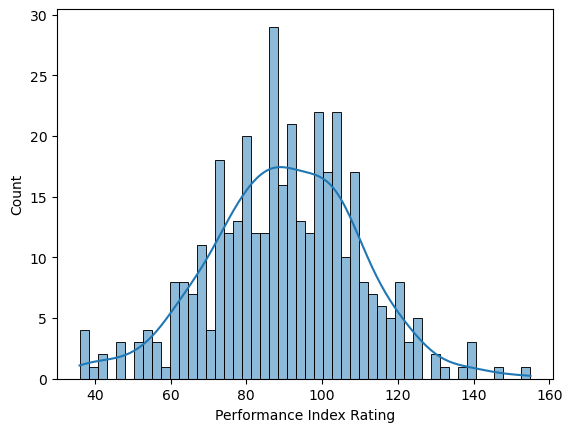

In [20]:
import seaborn as sns

sns.histplot(data=df_sctatistic, x="Performance Index Rating", kde = True, bins=50)

In [21]:
df_sctatistic[df_sctatistic["Performance Index Rating"] < 90].shape

(181, 18)

In [22]:
df_sctatistic[df_sctatistic["Performance Index Rating"] >= 90].shape

(195, 18)

In [23]:
df_sctatistic.shape

(376, 18)

🎯 Hedef Tanımı

Performance Index Rating < 90 → 0

Performance Index Rating ≥ 90 → 1

In [24]:
df_sctatistic["target"] = (df_sctatistic["Performance Index Rating"] >= 90).astype(int)
df_sctatistic["target"].value_counts()

target
1    195
0    181
Name: count, dtype: int64

In [25]:
df.to_csv(
    "haberler.csv",
    index=False,
    encoding="utf-8-sig"
)

In [26]:
df_sctatistic.to_csv(
    "istatistikler.csv",
    index=False,
    encoding="utf-8-sig"
)